In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from gaussian_process import Multifidelity_GP
%matplotlib inline  
np.random.seed(1234)

In [2]:
def f_H(x):
    return (6.0*x-2.0)**2 * np.sin(12.*x-4.0)

def f_L(x):
    return 0.5*f_H(x) + 10.0*(x-0.5) - 5.0

def Normalize(X, X_m, X_s):
    return (X-X_m)/(X_s)

In [3]:
N_H = 3
N_L = 8
D = 1
lb = 0.0*np.ones(D)
ub = 1.0*np.ones(D)
noise_L = 0.00
noise_H = 0.00

Normalize_input_data = 1
Normalize_output_data = 1

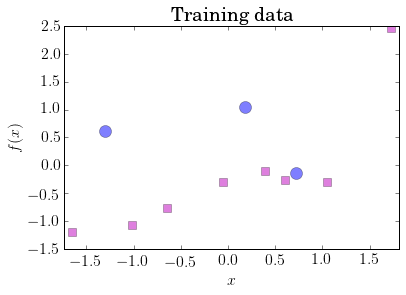

In [4]:
# Training data    
X_L = lb + (ub-lb)*lhs(D, N_L)
y_L = f_L(X_L) + noise_L*np.random.randn(N_L,D)

X_H = lb + (ub-lb)*lhs(D, N_H)
y_H = f_H(X_H) + noise_H*np.random.randn(N_H,D)

# Test data
nn = 200
X_star = np.linspace(lb, ub, nn)[:,None]
y_star = f_H(X_star)

 #  Normalize Input Data
if Normalize_input_data == 1:
    X = np.vstack((X_L,X_H))
    X_m = np.mean(X, axis = 0)
    X_s = np.std(X, axis = 0)   
    X_L = Normalize(X_L, X_m, X_s)
    X_H = Normalize(X_H, X_m, X_s)
    lb = Normalize(lb, X_m, X_s)
    ub = Normalize(ub, X_m, X_s)
    X_star = Normalize(X_star, X_m, X_s)

#  Normalize Output Data
if Normalize_output_data == 1:
    y = np.vstack((y_L,y_H))
    y_m = np.mean(y, axis = 0)
    y_s = np.std(y, axis = 0)   
    y_L = Normalize(y_L, y_m, y_s)
    y_H = Normalize(y_H, y_m, y_s)
    y_star = Normalize(y_star, y_m, y_s)
    
# Plot the training data
plt.figure(facecolor='w')
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.plot(X_H,y_H,'bo', markersize = 12, alpha = 0.5, label = "Data")
plt.plot(X_L,y_L,'ms', markersize = 8, alpha = 0.5, label = "Data")
plt.title("Training data")
ax = plt.gca()
ax.set_xlim([lb[0], ub[0]])
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [5]:
# Define model
model = Multifidelity_GP(X_L, y_L, X_H, y_H)

Total number of parameters: 7


In [6]:
# Train 
model.train()

Log likelihood 14.634070904
Log likelihood 13.6691445427
Log likelihood 13.5849281646
Log likelihood 13.4800479832
Log likelihood 13.3749066328
Log likelihood 13.3090152399
Log likelihood 13.1702384248
Log likelihood 13.0866244712
Log likelihood 13.0173910488
Log likelihood 12.6832985422
Log likelihood 12.40799591
Log likelihood 12.271475126
Log likelihood 12.2283962562
Log likelihood 12.1922457933
Log likelihood 12.1393062002
Log likelihood 12.1148192962
Log likelihood 12.1037718096
Log likelihood 12.0891465684
Log likelihood 12.0703934875
Log likelihood 12.0246583837
Log likelihood 11.9862755062
Log likelihood 11.8598884337
Log likelihood 11.8523419218
Log likelihood 11.8166469357
Log likelihood 11.8102483218
Log likelihood 11.7931529052
Log likelihood 11.7810199139
Log likelihood 11.7670532374
Log likelihood 11.7532781973
Log likelihood 11.7441667477
Log likelihood 11.7433008873
Log likelihood 11.7392189445
Log likelihood 11.7386947705
Log likelihood 11.7385778208
Log likelihood 11.

Relative L2 error u: 7.424375e-02


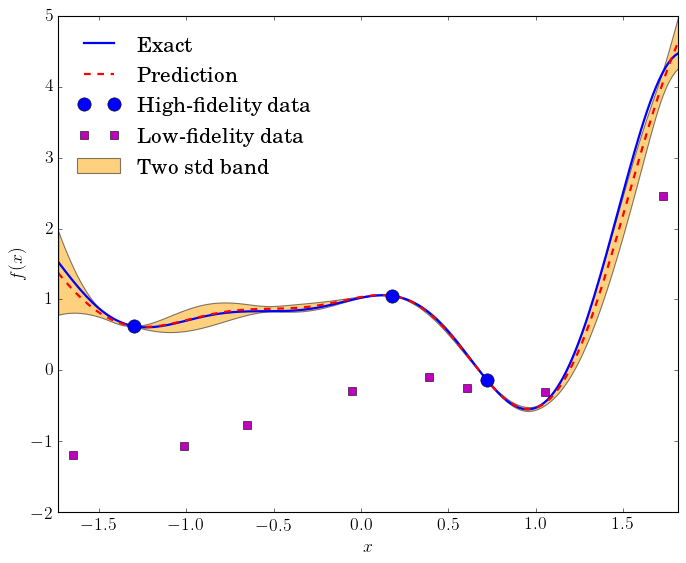

In [9]:
# Predict
y_pred, y_var = model.predict(X_star)
y_var = np.abs(np.diag(y_var))

# Check accuracy                       
error = np.linalg.norm(y_pred-y_star,2)/np.linalg.norm(y_star,2)
print("Relative L2 error u: %e" % (error))

# Plot
plt.figure(1, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)
plt.plot(X_star, y_star, 'b-', label = "Exact", linewidth=2)
plt.plot(X_star, y_pred, 'r--', label = "Prediction", linewidth=2)
lower = y_pred - 2.0*np.sqrt(y_var[:,None])
upper = y_pred + 2.0*np.sqrt(y_var[:,None])
plt.fill_between(X_star.flatten(), lower.flatten(), upper.flatten(), 
                 facecolor='orange', alpha=0.5, label="Two std band")
plt.plot(X_H,y_H,'bo', markersize = 12, label = "High-fidelity data")
plt.plot(X_L,y_L,'ms', markersize = 8, label = "Low-fidelity data")
plt.legend(frameon=False,loc='upper left')
ax = plt.gca()
ax.set_xlim([lb[0], ub[0]])
plt.xlabel('$x$')
plt.ylabel('$f(x)$')